### JAI SHREE RAM

Stage 1: Predicting if patient should be admitted or not

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
df = pd.read_csv('heart_disease_admission.csv')
df.head()


Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Admitted  
0                        3         3      Yes  
1                        0         7       No  
2                        0         7      Yes  
3                        1         7       No  
4                        1         3       No

In [51]:
df.describe()

Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952        1.14521   
min        0.000000     0.000000   71.000000         0.000000        0.00000   
25%        0.000000     0.000000  133.000000         0.000000        0.00000   
50%        0.000000     2.000000  153.500000         0.000000        0.80000   
75%        0.000000     2.000000  166.000000         1.000000        1.60000   
max        1.000000     2.000000  202.000000         1.000000        6.20000   

       Slope of ST  Number of vessels fluro    Thallium  
count   270.000000               270.000000  270.000000  
mean      1.585185                 0.670370    4.696296  
std       0.614390                 0.943896    1.940659  
min       1.000000                 0.000000    3.000000  
25%       1.000000                 0.000000    3.000000  
50%       2.000000                 0.000000    3.000000  
75%       2.000000                 1.000000    7.000000  
max       3.000000                 3.000000    7.000000

In [52]:
# Checking for missing values.
df.isnull().values.any()

False

<AxesSubplot:xlabel='Admitted', ylabel='count'>

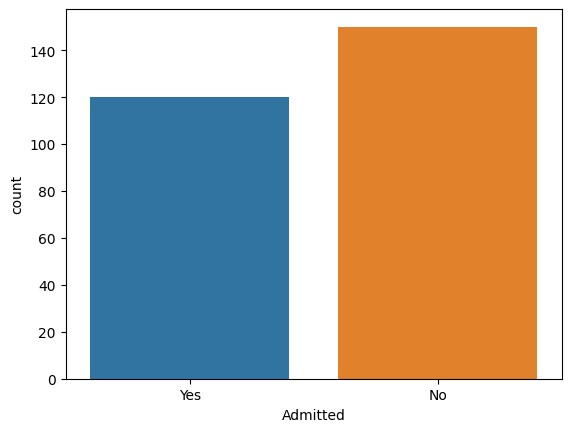

In [53]:
sns.countplot(x='Admitted', data=df)

In [54]:
# Checking for any correlations.
df.corr()

Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.391046         0.262659  0.132045   

                         Cholesterol  FBS over 120  EKG results    Max HR  \
Age                         0.220056      0.123458     0.128171 -0.402215   
Sex                        -0.201647      0.042140     0.039253 -0.076101   
Chest pain type             0.090465     -0.098537     0.074325 -0.317682   
BP                          0.173019      0.155681     0.116157 -0.039136   
Cholesterol                 1.000000      0.025186     0.167652 -0.018739   
FBS over 120                0.025186      1.000000     0.053499  0.022494   
EKG results                 0.167652      0.053499     1.000000 -0.074628   
Max HR                     -0.018739      0.022494    -0.074628  1.000000   
Exercise angina             0.078243     -0.004107     0.095098 -0.380719   
ST depression               0.027709     -0.025538     0.120034 -0.349045   
Slope of ST                -0.005755      0.044076     0.160614 -0.386847   
Number of vessels fluro     0.126541      0.123774     0.114368 -0.265333   
Thallium                    0.028836      0.049237     0.007337 -0.253397   

                         Exercise angina  ST depression  Slope of ST  \
Age                             0.098297       0.194234     0.159774   
Sex                             0.180022       0.097412     0.050545   
Chest pain type                 0.353160       0.167244     0.136900   
BP                              0.082793       0.222800     0.142472   
Cholesterol                     0.078243       0.027709    -0.005755   
FBS over 120                   -0.004107      -0.025538     0.044076   
EKG results                     0.095098       0.120034     0.160614   
Max HR                         -0.380719      -0.349045    -0.386847   
Exercise angina                 1.000000       0.274672     0.255908   
ST depression                   0.274672       1.000000     0.609712   
Slope of ST                     0.255908       0.609712     1.000000   
Number of vessels fluro         0.153347       0.255005     0.109498   
Thallium                        0.321449       0.324333     0.283678   

                         Number of vessels fluro  Thallium  
Age                                     0.356081  0.106100  
Sex                                     0.086830  0.391046  
Chest pain type                         0.225890  0.262659  
BP                                      0.085697  0.132045  
Cholesterol                             0.126541  0.028836  
FBS over 120                            0.123774  0.049237  
EKG results                             0.114368  0.007337  
Max HR                                 -0.265333 -0.253397  
Exercise angina                         0.153347  0.321449  
ST depression                           0.255005  0.324333  
Slope of ST                             0.109498  0.283678  
Number of vessels fluro                 1.000000  0.255648  
Thallium                                0.255648  1.000000

In [55]:
#change presence to 1 and absence to 0
df['Admitted'] = df['Admitted'].map({'Yes': 1, 'No': 0})
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Admitted  
0                        3         3         1  
1                        0         7         0  
2                        0         7         1  
3                        1         7         0  
4                        1         3         0

#### KNN

In [56]:
# Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

In [57]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [58]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

8.246211251235321

In [59]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [60]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [61]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[31  9]
 [ 8 20]]


In [62]:
print(accuracy_score(y_test,y_pred))

0.75


#### SVM

In [63]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [64]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [65]:
print(accuracy_score(y_test,y_pred))

0.75


#### RF

In [66]:
rf = RandomForestClassifier(n_estimators=500, random_state=12, max_depth=5)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)

In [67]:
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)

confusion matrix
[[32  8]
 [ 7 21]]


In [68]:
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100)

Accuracy of Random Forest: 77.94117647058823


In [78]:
#give prediction score of every prediction
rf_predicted_proba = rf.predict_proba(x_test)
print("Prediction score of every prediction")
print(rf_predicted_proba)


Prediction score of every prediction
[[0.59771411 0.40228589]
 [0.73720724 0.26279276]
 [0.08373282 0.91626718]
 [0.28521771 0.71478229]
 [0.73214841 0.26785159]
 [0.63374818 0.36625182]
 [0.79771357 0.20228643]
 [0.88577378 0.11422622]
 [0.44538254 0.55461746]
 [0.50107773 0.49892227]
 [0.68738745 0.31261255]
 [0.62998254 0.37001746]
 [0.53395615 0.46604385]
 [0.10440566 0.89559434]
 [0.12037578 0.87962422]
 [0.76485696 0.23514304]
 [0.83941722 0.16058278]
 [0.28368138 0.71631862]
 [0.3653823  0.6346177 ]
 [0.85519171 0.14480829]
 [0.01844564 0.98155436]
 [0.90542539 0.09457461]
 [0.0831781  0.9168219 ]
 [0.28145342 0.71854658]
 [0.40968782 0.59031218]
 [0.7525104  0.2474896 ]
 [0.59870007 0.40129993]
 [0.83161636 0.16838364]
 [0.37263309 0.62736691]
 [0.36664319 0.63335681]
 [0.47931123 0.52068877]
 [0.3746918  0.6253082 ]
 [0.02098382 0.97901618]
 [0.95884585 0.04115415]
 [0.16086473 0.83913527]
 [0.5722639  0.4277361 ]
 [0.01892414 0.98107586]
 [0.21107838 0.78892162]
 [0.96144714 

(68, 2)

In [86]:
df_final = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predicted, 'Prediction Score of 0': rf_predicted_proba[:,0], 'Prediction Score of 1': rf_predicted_proba[:,1]})

In [87]:
df_final

Actual  Predicted  Prediction Score of 0  Prediction Score of 1
64        0          0               0.597714               0.402286
135       0          0               0.737207               0.262793
153       0          1               0.083733               0.916267
189       1          1               0.285218               0.714782
253       0          0               0.732148               0.267852
..      ...        ...                    ...                    ...
111       0          0               0.820084               0.179916
73        0          0               0.810189               0.189811
44        1          1               0.336673               0.663327
200       0          0               0.610536               0.389464
171       1          1               0.376509               0.623491

[68 rows x 4 columns]

In [89]:
#keep only the rows where the prediction score of 1 is greater than 0.5
df_final = df_final[df_final['Prediction Score of 1'] > 0.5]

In [91]:
df_final.drop(['Prediction Score of 0'], axis=1, inplace=True)

In [92]:
df_final

Actual  Predicted  Prediction Score of 1
153       0          1               0.916267
189       1          1               0.714782
256       0          1               0.554617
103       1          1               0.895594
8         1          1               0.879624
199       1          1               0.716319
59        1          1               0.634618
176       1          1               0.981554
7         1          1               0.916822
76        0          1               0.718547
252       1          1               0.590312
188       0          1               0.627367
101       1          1               0.633357
96        0          1               0.520689
74        0          1               0.625308
261       1          1               0.979016
227       1          1               0.839135
92        1          1               0.981076
159       1          1               0.788922
230       1          1               0.796498
187       0          1               0.681753
20        1          1               0.945926
181       1          1               0.872455
146       1          1               0.595778
196       0          1               0.526335
110       1          1               0.861045
201       1          1               0.650438
44        1          1               0.663327
171       1          1               0.623491

In [93]:
#sort based on prediction score of 1
df_final.sort_values(by=['Prediction Score of 1'], ascending=False, inplace=True)

In [94]:
df_final

Actual  Predicted  Prediction Score of 1
176       1          1               0.981554
92        1          1               0.981076
261       1          1               0.979016
20        1          1               0.945926
7         1          1               0.916822
153       0          1               0.916267
103       1          1               0.895594
8         1          1               0.879624
181       1          1               0.872455
110       1          1               0.861045
227       1          1               0.839135
230       1          1               0.796498
159       1          1               0.788922
76        0          1               0.718547
199       1          1               0.716319
189       1          1               0.714782
187       0          1               0.681753
44        1          1               0.663327
201       1          1               0.650438
59        1          1               0.634618
101       1          1               0.633357
188       0          1               0.627367
74        0          1               0.625308
171       1          1               0.623491
146       1          1               0.595778
252       1          1               0.590312
256       0          1               0.554617
196       0          1               0.526335
96        0          1               0.520689